$$\LARGE\textbf{Programming for Artificial Intelligence and Data Science}$$

$$\Large\textbf{Coursework 2: K-Means Clustering}$$

$$\Large\textbf{Daniel Elston}$$

$$\newline$$

$\Large\textbf{Task 1: Preparation of Two Datasets}$

The datasets below are suitable for k means clustering as they are not uniformly spread, random points. Instead, there are a greater concentration of points in certain regions. A k means algorithm would have difficulty assigning uniformly spread points to clusters.

Dataset 1 has a clear difference between clusters. This will allow easy cluster assignment when using pen and paper.

**Dataset 1:** 

$$D_1 = [(1,1), (2,1), (2,2), (1,9), (1,10), (3,9), (10,10), (10,9), (8,8)]$$

Dataset 2 is the 'iris' dataset which consists of 3 iris species and measurements of their features. The source as well as some file description is noted below.

In [1]:
# not necessary on EECS Jupyterlab systems
import sys
import pandas as pd
sys.path.append('/usr/local/lib/python3.8/site-packages')

from sklearn.datasets import load_iris
iris = load_iris()
print(iris.DESCR)

iris

import csv
with open('iris.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, quoting=csv.QUOTE_NONNUMERIC)
    writer.writerow(iris.feature_names)
    writer.writerows(iris.data.tolist())

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

$$\newline$$

$\Large\textbf{Task 2: Application of K-Means Clustering on Paper}$

Algorithm Step by Step:

1)    Decide on the number of clusters, k, by eye, randomly or apply to elbow method detailed later.

2)    Calculate the euclidean distance between each point and each centroid

3)    Assign each data point to the nearest centroid

4)    Calculate the mean distance between each point and its assigned centroid

5)    Update your centroid position to the newly calculated mean distance

6)    Repeat steps 3-5 until convergence.

To start, there are obviously 3 clusters of points, so we will use 3 centroids. The centroids are placed at random initial starting points, shown below.

$$C_1 = (3,8)$$

$$C_2 = (2,3)$$

$$C_3 = (7,7)$$

The euclidean distance is now calculated from each point to each centroid. The euclidean distance is found using,

$$S_{Euclidean} = \sqrt{(C_{nx} - p_{nx})^2 - (C_{ny} - p_{ny})^2} $$

where $p$ is a coordinate from the dataset. The euclidean distance between each point and each centroid is shown below.

| p | S_C1 | S_C2 | S_C3  |
|-----|-----|-----|-----|
| 1  | 7.3 | 2.2 | 8.5 |
| 2  | 7.1 | 1.4 | 7.8 |
| 3  | 6.1 | 1.0 | 7.1  |
| 4  | 2.2 | 6.1 | 6.3  |
| 5  | 2.8 | 7.1 | 6.7 |
| 6  | 1.0 | 6.1 | 4.5  |
| 7  | 7.3 | 10.6 | 4.2  |
| 8  | 7.1 | 10.0 | 3.6  |
| 9  | 5.0 | 7.8 | 1.4 |

We can now assign each point to its nearest centroid. Points 4, 5 and 6 are assigned to centroid 1. Points 1, 2 and 3 are assigned to centroid 2. Points 7, 8 and 9 are assigned to centroid 3. The mean is now calculated for each point per centroid. The mean is found using,

$$ \overline{S}= \frac{1}{n} \sum_{i = 1}^n S_i $$

where n is the number of points per centroid. Starting with centroid 1, the points assigned are as follows,

$$C_{1}(p) = (1,9), (1,10), (3,9)$$

The means are as follows,

$$ \overline{S_x} = \frac{1}{3} \sum_{i = 1}^n (1 + 1 + 3) = 1.7 ,$$

$$ \overline{S_y} = \frac{1}{3} \sum_{i = 1}^n (9 + 10 + 9) = 9.3 ,$$

giving the updated centroid 1 coordinates (1.7, 9.3). The means are calculated in the same way for each centroid, giving each centroids updated coordinates. The above steps are repeated until the updated centroid coordinates do not change.

The final coordinates give the centroids best fitted to k clusters of points. The results can be easily sanity checked by taking the mean of the assigned points. It is expected that the final updated centroids will be very close to these coordiantes. Generally, as you increase the number of iterations, the algorithms accuracy will increase. Regardless of the dataset, an acceptably accurate result should be achieved within 10 iterations. However, for very large datasets, iterations should increase with size of dataset.

$$\newline$$

$\Large\textbf{Task 3: Test Harness}$

The test harness below gives a k means cluster result from the use of a verified program. Sklearn has a k means module that returns highly accurate results. This should provide sufficient coverage of the algorithm provides in section 4. Using Sklearns k means module as a model solution, a comparison between the result of my algorithm and Sklearns algorithm are compared.

A simple unit test is shown below tasked with ensuring simple functions such as finding the mean are working correctly.

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

import unittest
import time

In [74]:
test_array = [1,2,3,4,5]

def run_unit_test(A):
    
    n = len(A)
    sum_of = sum(A)
    mean = sum_of / n
    
    return mean

run_unit_test(test_array)

3.0

In [3]:
sns.set(style="ticks")
sns.set_style("darkgrid")

In [4]:
iris = load_iris()

In [5]:
df_iris = pd.DataFrame(iris.data, columns = iris.feature_names)
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
df_iris_lvw = df_iris[['petal length (cm)', 'petal width (cm)']]
df_iris_lvw

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [7]:
X = df_iris_lvw.to_numpy()

In [8]:
distortion=[]

for i in range(1,10):
    
    kmeans=KMeans(n_clusters = i, init = 'k-means++', n_init = 10, max_iter = 100).fit(X)
    
    distortion.append(kmeans.inertia_)

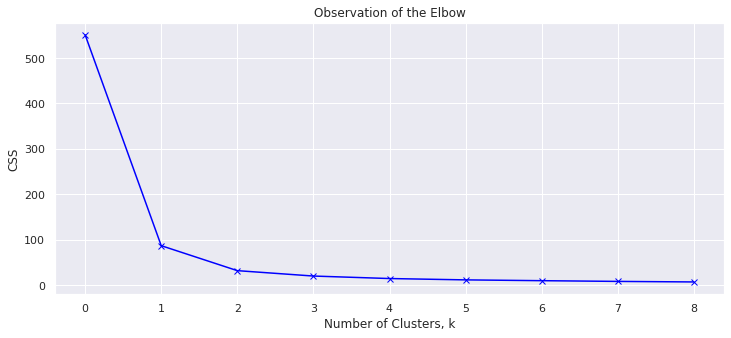

In [9]:
fig, ax1= plt.subplots(1, 1, figsize=(12,5))
    
ax1.plot(distortion, color='blue', marker='x')
ax1.set_title('Observation of the Elbow')
ax1.set_xlabel('Number of Clusters, k')
ax1.set_ylabel('CSS') 
plt.show()

In [10]:
kmeans=KMeans(n_clusters = 3, init = 'k-means++', n_init = 10, max_iter = 100)
y_kmeans = kmeans.fit_predict(X)

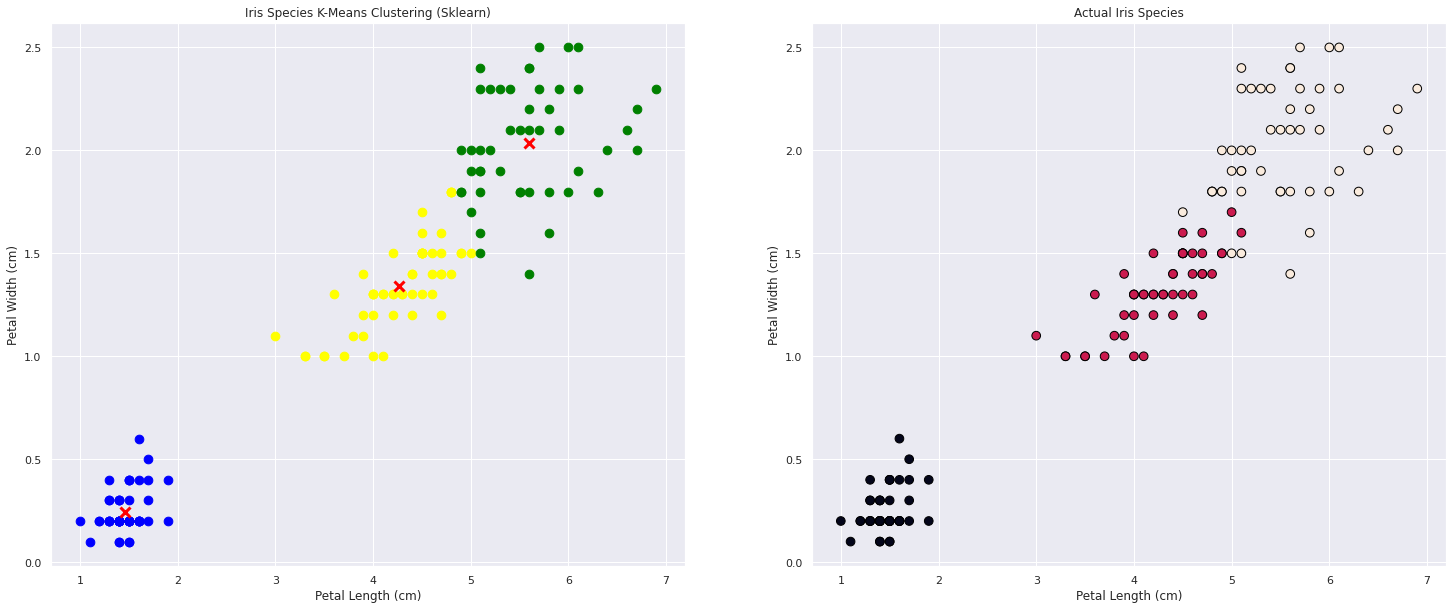

In [11]:
fig, ax2= plt.subplots(1, 2, sharex=False, figsize=(25,10))

ax2[0].scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 75, c = 'yellow', label = 'Iris-Setosa')
ax2[0].scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 75, c = 'blue', label = 'Iris-Versicolour')
ax2[0].scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 75, c = 'green', label = 'Iris-Virginica')

ax2[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', marker='x', label = 'Centroids', linewidths=3)

ax2[0].set_title('Iris Species K-Means Clustering (Sklearn)')
ax2[0].set_xlabel('Petal Length (cm)')
ax2[0].set_ylabel('Petal Width (cm)') 


ax2[1].scatter(X[:,0], X[:,1], c=iris['target'], edgecolors='black', s = 75)

ax2[1].set_title('Actual Iris Species')
ax2[1].set_xlabel('Petal Length (cm)')
ax2[1].set_ylabel('Petal Width (cm)') 


plt.show()

$$\newline$$

$\Large\textbf{Task 4: Implementing K-Means Clustering in Python}$

In [53]:
X = df_iris_lvw.to_numpy()

In [54]:
points = X
k = 3
iterations = 100

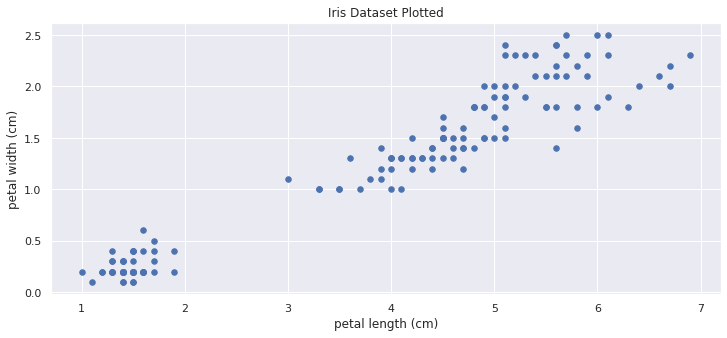

In [55]:
fig, ax3 = plt.subplots(1, 1, sharex=False, figsize=(12,5))

ax3.scatter(points[:,0], points[:,1], s=30)
ax3.set_title("Iris Dataset Plotted")
ax3.set_xlabel('petal length (cm)')
ax3.set_ylabel('petal width (cm)')
plt.show()

In [56]:
def random_centroids(points):
    
    length = len(points)
    index = np.random.permutation(length)
    origional_centroids = points[index[:k]]
    
    return origional_centroids

In [57]:
random_centroid_results = random_centroids(points)

In [58]:
def assign_points(points, centroids):
    
    length = len(points)
    distance = np.empty((length, k))
    
    for i in range(k):
        difference = (points - centroids[i,:])
        euclidean_distance = np.linalg.norm(difference, axis=1)
        distance[:, i] = euclidean_distance
        
    assign = np.argmin(distance, axis=1)
    
    return assign

In [59]:
labels = assign_points(points, random_centroid_results)

In [60]:
def compute_mean(points, labels):
    
    width = points.shape[1]
    means = np.zeros((k, width))
    
    for i in range(k):
        assigned = points[labels == i, :]
        means[i, :] = np.mean(assigned, axis=0)
    return means

In [61]:
cent = compute_mean(points, labels)

In [62]:
def RSSE(points, labels, centroids):
    
    length = len(points)
    distance = np.zeros(length)
    
    for i in range(k):
        assigned = points[labels == i]
        difference = assigned - centroids[i]
        distance[labels == i] = np.linalg.norm(difference, axis=1)
        dist_sq = np.square(distance)
        dist_sum = np.sum(dist_sq)
        
    return dist_sum

In [63]:
RS = RSSE(points, labels, cent)

In [64]:
rsse_store = []
centroid_store = []

for i in range(1):
    
    updated_centroids = random_centroids(points)
    
    for j in range(iterations):
        
        prev_centroids = updated_centroids
        labels = assign_points(points, prev_centroids)
        updated_centroids = compute_mean(points, labels)
        
        if np.all(prev_centroids == updated_centroids):
            break
            
    rsse_store.append(RSSE(points, labels, updated_centroids))
    centroid_store.append(updated_centroids)

In [65]:
print('Point Assigned Labels: \n', labels)
print('\n')
print('Final Centroid Centers: \n', updated_centroids.round(1))
print('\n')

Point Assigned Labels: 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 0 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2
 2 2]


Final Centroid Centers: 
 [[4.3 1.4]
 [1.5 0.2]
 [5.6 2. ]]




In [66]:
# Measure time
def measure_time(func):
    start = time.time()
    func()
    end = time.time()
    print(end - start)  
    
measure_time(lambda: random_centroids(points))
measure_time(lambda: assign_points(points, random_centroid_results))
measure_time(lambda: compute_mean(points, labels))
measure_time(lambda: RSSE(points, labels, cent))

print('Execution time of algorithm for 100 iterations is approximately: 1.20ms')
print('Execution time of algorithm for 1000 iterations is approximately: 1.93ms')

0.00021600723266601562
0.0003304481506347656
0.0007081031799316406
0.00031447410583496094
Execution time of algorithm for 100 iterations is approximately: 1.20ms
Execution time of algorithm for 1000 iterations is approximately: 1.93ms


The limitations of this algorithm include the need for a manual input of k, when not automating with the elbow method. This particular algorithm only uses euclidean distance, if another method for finding distance had to be used, it would have to be manually updated. This algorithm further expects only 2 dimensions of data, however it could be modified for more. Also, there are no Principle Component Analysis (CPA) algorithms for dealing with greater dimensions. The k means method in general is limited to only working when there are partially defined clusters in the data. It would not work with a dataset where the points are uniformly distributed (such as gas particles in equilibrium).

This algorithm is not particularly complex. The algorithm simply initiates the steps listed in task 2. The functions have been kept small and concise. The for loop at the end of the algorithm simply initiates each function until equilibrium is reached. The algorithm does not take long to execute do to a small number of iterations and simple functions. An example of the small run time is shown above. An increased dataset and number of iterations or k may increase this time.

$$\newline$$

$\Large\textbf{Task 5: Algorithm Visualisation}$

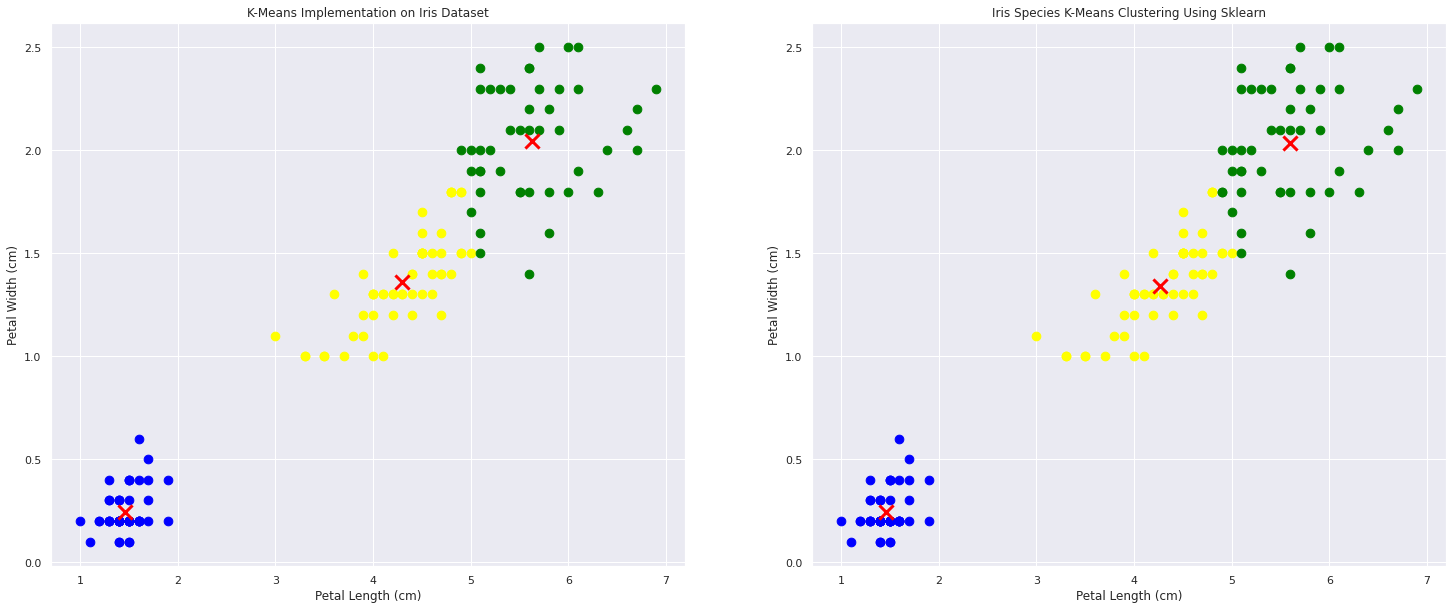

In [67]:
fig, ax = plt.subplots(1, 2, figsize=(25, 10))


ax[0].scatter(points[labels == 0, 0], points[labels == 0, 1], s = 75, c = 'yellow')
ax[0].scatter(points[labels == 1, 0], points[labels == 1, 1], s = 75, c = 'blue')
ax[0].scatter(points[labels == 2, 0], points[labels == 2, 1], s = 75, c = 'green')
ax[0].scatter(centroid_store[np.argmin(rsse_store)][:, 0], centroid_store[np.argmin(rsse_store)][:, 1], s=200, c='red', marker='x', linewidths=3)

ax[0].set_title('K-Means Implementation on Iris Dataset')
ax[0].set_xlabel('Petal Length (cm)')
ax[0].set_ylabel('Petal Width (cm)') 


ax[1].scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 75, c = 'yellow')
ax[1].scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 75, c = 'blue')
ax[1].scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 75, c = 'green')
ax[1].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 200, c = 'red', marker='x', linewidths=3)

ax[1].set_title('Iris Species K-Means Clustering Using Sklearn')
ax[1].set_xlabel('Petal Length (cm)')
ax[1].set_ylabel('Petal Width (cm)')


plt.show()

$$\newline$$

Below the the algorithm applied to the test dataset from task 1.

In [40]:
D_1 = np.array([[1,1], [2,1], [2,2], [1,9], [1,10], [3,9], [10,10], [10,9], [8,8]])
k = 3
iterations = 100

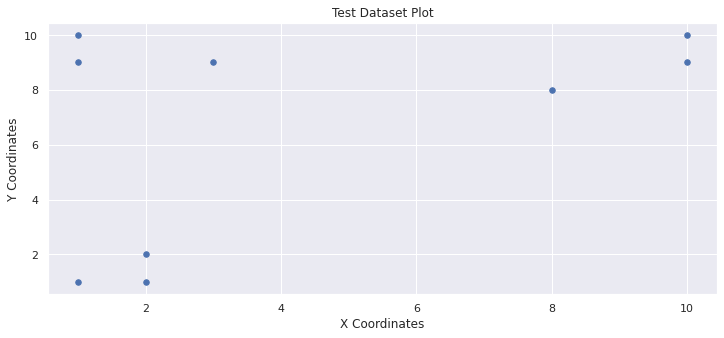

In [41]:
fig, ax3 = plt.subplots(1, 1, sharex=False, figsize=(12,5))

ax3.scatter(D_1[:,0], D_1[:,1], s=30)
ax3.set_title("Test Dataset Plot")
ax3.set_xlabel('X Coordinates')
ax3.set_ylabel('Y Coordinates')
plt.show()

In [42]:
def random_centroids(points):
    
    length = len(points)
    index = np.random.permutation(length)
    origional_centroids = points[index[:k]]
    
    return origional_centroids

In [43]:
random_centroid_results = random_centroids(D_1)

In [44]:
def assign_points(points, centroids):
    
    length = len(points)
    distance = np.empty((length, k))
    
    for i in range(k):
        difference = (points - centroids[i,:])
        euclidean_distance = np.linalg.norm(difference, axis=1)
        distance[:, i] = euclidean_distance
        
    assign = np.argmin(distance, axis=1)
    
    return assign

In [45]:
labels = assign_points(D_1, random_centroid_results)

In [46]:
def compute_mean(points, labels):
    
    width = points.shape[1]
    means = np.zeros((k, width))
    
    for j in range(k):
        assigned = points[labels == j, :]
        means[j, :] = np.mean(assigned, axis=0)
    return means

In [47]:
cent = compute_mean(D_1, labels)

In [48]:
def RSSE(points, labels, centroids):
    
    length = len(points)
    distance = np.zeros(length)
    
    for z in range(k):
        assigned = points[labels == z]
        difference = assigned - centroids[z]
        distance[labels == z] = np.linalg.norm(difference, axis=1)
        dist_sq = np.square(distance)
        dist_sum = np.sum(dist_sq)
        
    return dist_sum

In [49]:
RS = RSSE(D_1, labels, cent)

In [50]:
rsse_store = []
centroid_store = []

for i in range(1):
    
    updated_centroids = random_centroids(D_1)
    
    for j in range(iterations):
        
        prev_centroids = updated_centroids
        labels = assign_points(D_1, prev_centroids)
        updated_centroids = compute_mean(D_1, labels)
        
        if np.all(prev_centroids == updated_centroids):
            break
            
    rsse_store.append(RSSE(D_1, labels, updated_centroids))
    centroid_store.append(updated_centroids)

In [51]:
print('Point Assigned Labels: \n', labels)
print('\n')
print('Final Centroid Centers: \n', updated_centroids.round(1))

Point Assigned Labels: 
 [1 1 1 2 2 2 0 0 0]


Final Centroid Centers: 
 [[9.3 9. ]
 [1.7 1.3]
 [1.7 9.3]]


$$\newline$$

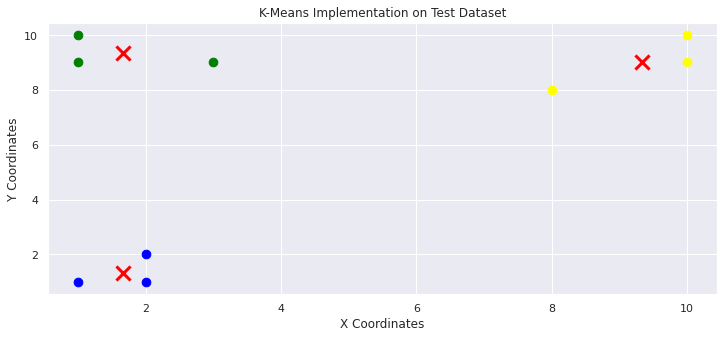

In [52]:
fig, ax5 = plt.subplots(1, 1, sharex=False, figsize=(12,5))

ax5.scatter(D_1[labels == 0, 0], D_1[labels == 0, 1], s = 75, c = 'yellow')
ax5.scatter(D_1[labels == 1, 0], D_1[labels == 1, 1], s = 75, c = 'blue')
ax5.scatter(D_1[labels == 2, 0], D_1[labels == 2, 1], s = 75, c = 'green')
ax5.scatter(centroid_store[np.argmin(rsse_store)][:, 0], centroid_store[np.argmin(rsse_store)][:, 1], s=200, c='red', marker='x', linewidths=3)

ax5.set_title('K-Means Implementation on Test Dataset')
ax5.set_xlabel('X Coordinates')
ax5.set_ylabel('Y Coordinates') 

plt.show()

$$\newline$$